
# Udacity Project 1: Investigate a Dataset - [Medical Appointment Dataset]
## by Ukachi Agnes Eze-Mbey

## Dataset Description

This is a data investigation and analysis of a medical Appointment Data Set.
This dataset collects information from over 100,000 medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 
The primary aim is to investigate and predict factors that influence patients showing up for appointments.

## Column Description

There are a total of 14 columns
>a. PatientId: This details the unique identification number of each patient.

>b. AppointmentID: This details the unique identification of each appointment scheduled.

>c. Gender: The gender of each patient.

>d. ScheduledDay: ScheduledDay tells us on what day the patient set up their appointment.

>e. AppointmentDay: This indicates the day of the scheduled appointment.

>f. Age: This details the age of each patient.

>g. Neighbourhood: Neighborhood indicates the location of the hospital

>h. Scholarship: Scholarship indicates whether or not the patient is enrolled in Brasilian welfare program .

>i. Hipertension: It indicates whether the patient suffers from Hypertension or not.

>j. Diabetes: It indicates whether the patient suffers from Diabetes or not.

>k. Alcoholism: It indicates whether the patient suffers from Alcoholism or not.

>l. Handcap: The number of handicaps that the patient has.

>m. SMS_received: This indicates whether the patient received an SMS reminder or not.

>n. No-show: This indicates whether the patient showed up for the appointment or not.


## Questions to be answered during investigation

The following will be investigated in this project:
>a. Relationship between gender and patients' showing up for appointment

>b. Relationship between disease and patients' showing up for appointment

>c. Relationship between a patient having a scholarship and them showing up for appointments

>d. Relationship between patients' genders and them showing up for appointments

In [181]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statistics
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



The necessary packages needed to fully investigate and analyze the data set given were imported

In [183]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.3

## Data Wrangling

In [184]:
#loading the data set
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [185]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [186]:
#Getting number of rows and columns
df.shape

(110527, 14)

There are 110527 rows and 14 columns

In [187]:
#Investigating fr missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no missing values but there are various data types: objects, floats and  integers

In [188]:
#Obtaining basic statistical attributes of the data set
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The average age of patients is 37 years. 
The minimum age is -1.
The maximum age is 115.
75% of patients are lessthan 55 years of age.
Majority of patients are  unaffected by diabetes, hypertension and alcoholism.

In [189]:
#Checking for duplicate rows
df.duplicated().sum()

0

There is no duplicate data

In [190]:
#checking for unique values of the dataset
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [191]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no null values in the columns

There are no missing values

# Data Cleaning

In this data cleaning phase, we will remove unnecessary columns, edit mis-spelt words. Also, we would clean data with outliers, edit ambiguous column headings and change formats of dates.

## Removing Unecessary Columns

From the questions to be answered, it can be seen that the patient ID and appointment ID are not important for futher analysis and investigation

In [192]:
#removing unnecessary columns
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [193]:
#implementing changes
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [194]:
#statistical analysis of updated dataset
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [195]:
#info on updated data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


## Searching for outliers

In [196]:
# let's check the number of times each age ocurred
Q=df.groupby('Age')['Age'].count()
Q.head(104)

Age
-1         1
 0      3539
 1      2273
 2      1618
 3      1513
        ... 
 98        6
 99        1
 100       4
 102       2
 115       5
Name: Age, Length: 104, dtype: int64

It can be seen that the age of an indiviual is -1. It is impossible to be of -1 years.

In [197]:
#analyzing the row with age -1
df.query("Age == -1")

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [198]:
#Removing the row with age -1
df.drop(index=99832, inplace=True)

In [199]:
#implementing the upgrade
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


It can be seen that the minimum age now 0

## Editing Misspelt and Ambiguous Column Headings

Next step is to rename the handcap and hipertension headings.
From the data set document given, for the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. This is quite ambiguous and confusing so the column heading needs to be redited  such that if the patient shows up, it is a yes and if not, then it's a no.

In [200]:
#renaming headings

df.rename(columns={'Hipertension' : 'Hypertension', 'Handcap' : 'Handicap', 'No-show':'Show'}, inplace=True)

In [201]:
#implementing the upgrade
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Converting Ambiguous Elements of the Columns 

The conversion of data types from int to str is necessary as those elements can be replaced

In [202]:
df['Scholarship'] = df['Scholarship'].astype(str)
df['Hypertension'] = df['Hypertension'].astype(str)
df['Diabetes'] = df['Diabetes'].astype(str)
df['Alcoholism'] = df['Alcoholism'].astype(str)
df['Handicap'] = df['Handicap'].astype(str)
df['SMS_received'] = df['SMS_received'].astype(str)

### Replacing Ambiguous Elements of Columns 

Replacing these elements makes the data set more readable

In [203]:
df['Scholarship'].replace('0','no', inplace=True)
df['Scholarship'].replace('1','yes', inplace=True)
df['Hypertension'].replace('0','no', inplace=True)
df['Hypertension'].replace('1','yes', inplace=True)
df['Diabetes'].replace('0','no', inplace=True)
df['Diabetes'].replace('1','yes', inplace=True)
df['Alcoholism'].replace('0','no', inplace=True)
df['Alcoholism'].replace('1','yes', inplace=True)
df['Handicap'].replace('0','no', inplace=True)
df['Handicap'].replace('1','yes', inplace=True)
df['SMS_received'].replace('0','no', inplace=True)
df['SMS_received'].replace('1','yes', inplace=True)

## Editing Ambiguous Column Elements

In [204]:
#upgating the values of No to Yes and Yes to No
df['Show'] = np.where(df['Show'] == 'No', 'yes', 'no')

In [205]:
#implementing the update
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,no,yes,no,no,no,no,yes
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,no,no,no,no,no,no,yes
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,no,no,no,no,no,no,yes
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,no,no,no,no,no,no,yes
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,no,yes,yes,no,no,no,yes


## Changing date format to make it more readable

In [206]:
#converting AppointmentDay to datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
#converting ScheduledDay to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [207]:
#confirming the upgrade
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns, UTC]
AppointmentDay    110526 non-null datetime64[ns, UTC]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null object
Hypertension      110526 non-null object
Diabetes          110526 non-null object
Alcoholism        110526 non-null object
Handicap          110526 non-null object
SMS_received      110526 non-null object
Show              110526 non-null object
dtypes: datetime64[ns, UTC](2), int64(1), object(9)
memory usage: 11.0+ MB


it can be seen that scheduleDay and AppointmentDay are now of the datetime data type

In [208]:
df.describe()

,Age
count,110526.000000
mean,37.089219
std,23.110026
min,0.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


In [209]:
#excluding time for easier investigation
df['AppointmentDay'] = df.AppointmentDay.dt.date
df['ScheduledDay'] = df.ScheduledDay.dt.date

In [210]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,no,yes,no,no,no,no,yes
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,no,no,no,no,no,no,yes
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,no,no,no,no,no,no,yes
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,no,no,no,no,no,no,yes
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,no,yes,yes,no,no,no,yes


# Exploratory Data Analysis

##  Univariate Exploration

### Functions for Visualization 

In [211]:
#Function to avoid repeated code

#This function returns a pie chart
def count_pie(df, var_name): 
    count_pie= df[var_name].value_counts()
    plt.pie(count_pie, labels = count_pie.index, startangle = 90,counterclock = False);
    plt.title(var_name+' '+ 'distribution')
    plt.axis('square')
    count_pie.index
#This function returns a bar chart    
def countplot(df,var_name):
    plt.figure(figsize =(7,5))
    sns.countplot(df[var_name])
    plt.title(var_name, fontsize=20)
    plt.show()
    
#This function returns a bar chart
def xviz(var, color):
    base_color = sns.color_palette()[color]
    plt.figure(figsize=[20,8])
    plt.xticks(rotation=90)
    return sns.countplot(data = df, x = var, color = base_color)

#This function returns a bar horizontal bar chart
def viz(var, color):
    base_color = sns.color_palette()[color]
    plt.figure(figsize=[25, 35])
    plt.title(var+' '+'Distribution Of the User of The System',fontsize=20)
    plt.ylabel(var+' '+'name')
    plt.ylabel('Count');
    return sns.countplot(data = df, y = var, color = base_color)


#The function takes in a numerical variable and returns a boxplot of its distribution
def unibox(df, var_name):
    sns.boxplot(data=df, x=var_name)
    
#The function takes in 2 column names and returns a bar chart showing the relationship between the 2 columns' distributio 
def bicountplot(df,var_name1,var_name2):
    sns.countplot(data = df, x = var_name1, hue = var_name2)
    plt.title(var_name1+ '  VS  '+ var_name2 +' '+'Distribution')
    plt.xlabel(var_name1)
    plt.ylabel('count');

### Gender Distribution

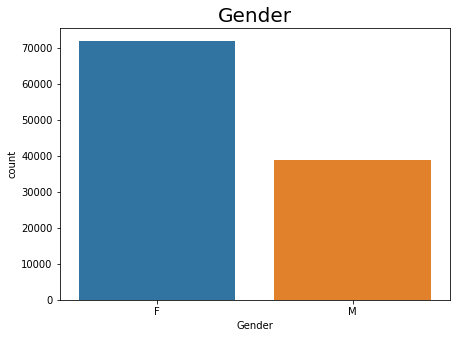

In [212]:
#Gender Distribution
countplot(df, 'Gender')
plt.savefig('image01.png');

In [213]:
#count of male and female patients
pd.DataFrame(df['Gender'].value_counts())


,Gender
F,71839
M,38687


There are 71,839 Female patients and 38,687 male patients

In [214]:
#percentage of make and female patients
pd.DataFrame(df['Gender'].value_counts(normalize=True)*100)

,Gender
F,64.997376
M,35.002624


#### Insight 

There are 65% female patients and 35% male patients

### Age Distribution 

In [215]:
#Age statistics
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

The oldest patient is 115 years, and 75% of patients are less than 55 years of age. The mean age is 37 years

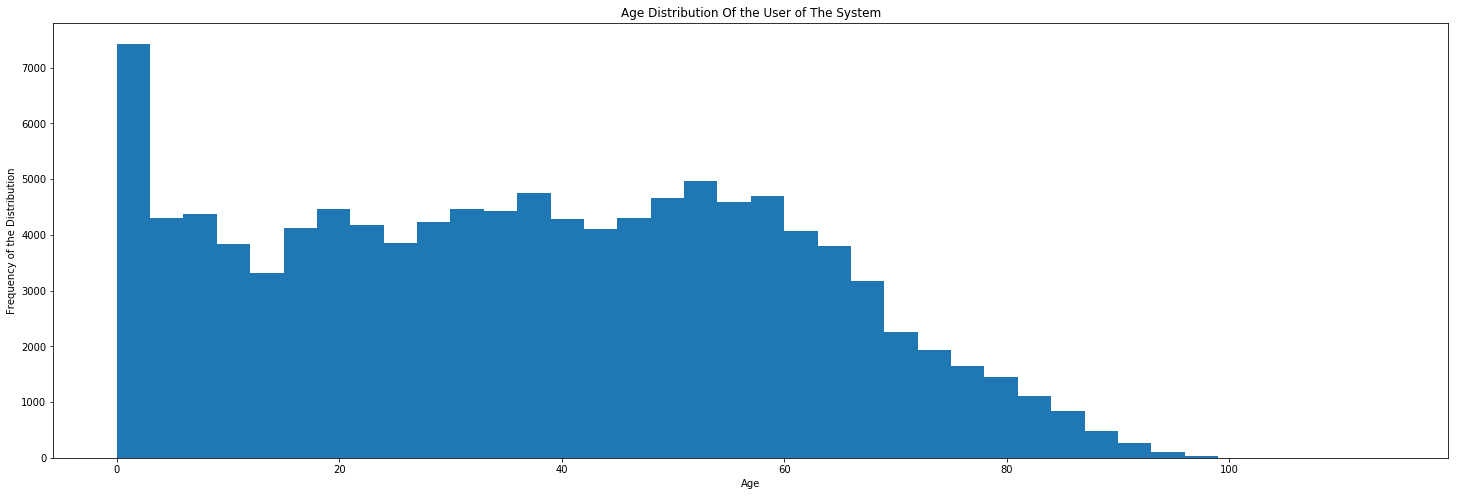

In [216]:
bins = np.arange(0, 115, 3)
plt.figure(figsize=[25, 8])
plt.hist(data = df, x = 'Age', bins = bins)
plt.title('Age Distribution Of the User of The System')
plt.xlabel('Age')
plt.ylabel('Frequency of the Distribution')
plt.savefig('image02.png');

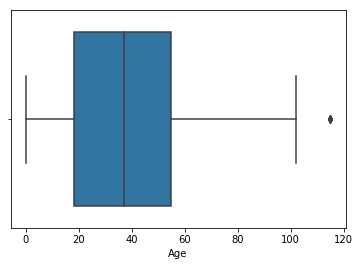

In [217]:
unibox(df, 'Age')
plt.savefig('image03.png');

#### Insight 

The patients with the most appointments booked are between age 0 amd 3 

 ### Neighbourhood Distribution 

In [218]:
#neighbourhood distribution count
pd.DataFrame(df['Neighbourhood'].value_counts())

,Neighbourhood
JARDIM CAMBURI,7717
MARIA ORTIZ,5805
RESISTÊNCIA,4431
JARDIM DA PENHA,3877
ITARARÉ,3514
...,...
ILHA DO BOI,35
ILHA DO FRADE,10
AEROPORTO,8
ILHAS OCEÂNICAS DE TRINDADE,2


In [219]:
#neighbourhood distribution in percentage
pd.DataFrame(df['Neighbourhood'].value_counts(normalize=True)*100)

,Neighbourhood
JARDIM CAMBURI,6.982068
MARIA ORTIZ,5.252158
RESISTÊNCIA,4.009011
JARDIM DA PENHA,3.507772
ITARARÉ,3.179342
...,...
ILHA DO BOI,0.031667
ILHA DO FRADE,0.009048
AEROPORTO,0.007238
ILHAS OCEÂNICAS DE TRINDADE,0.001810


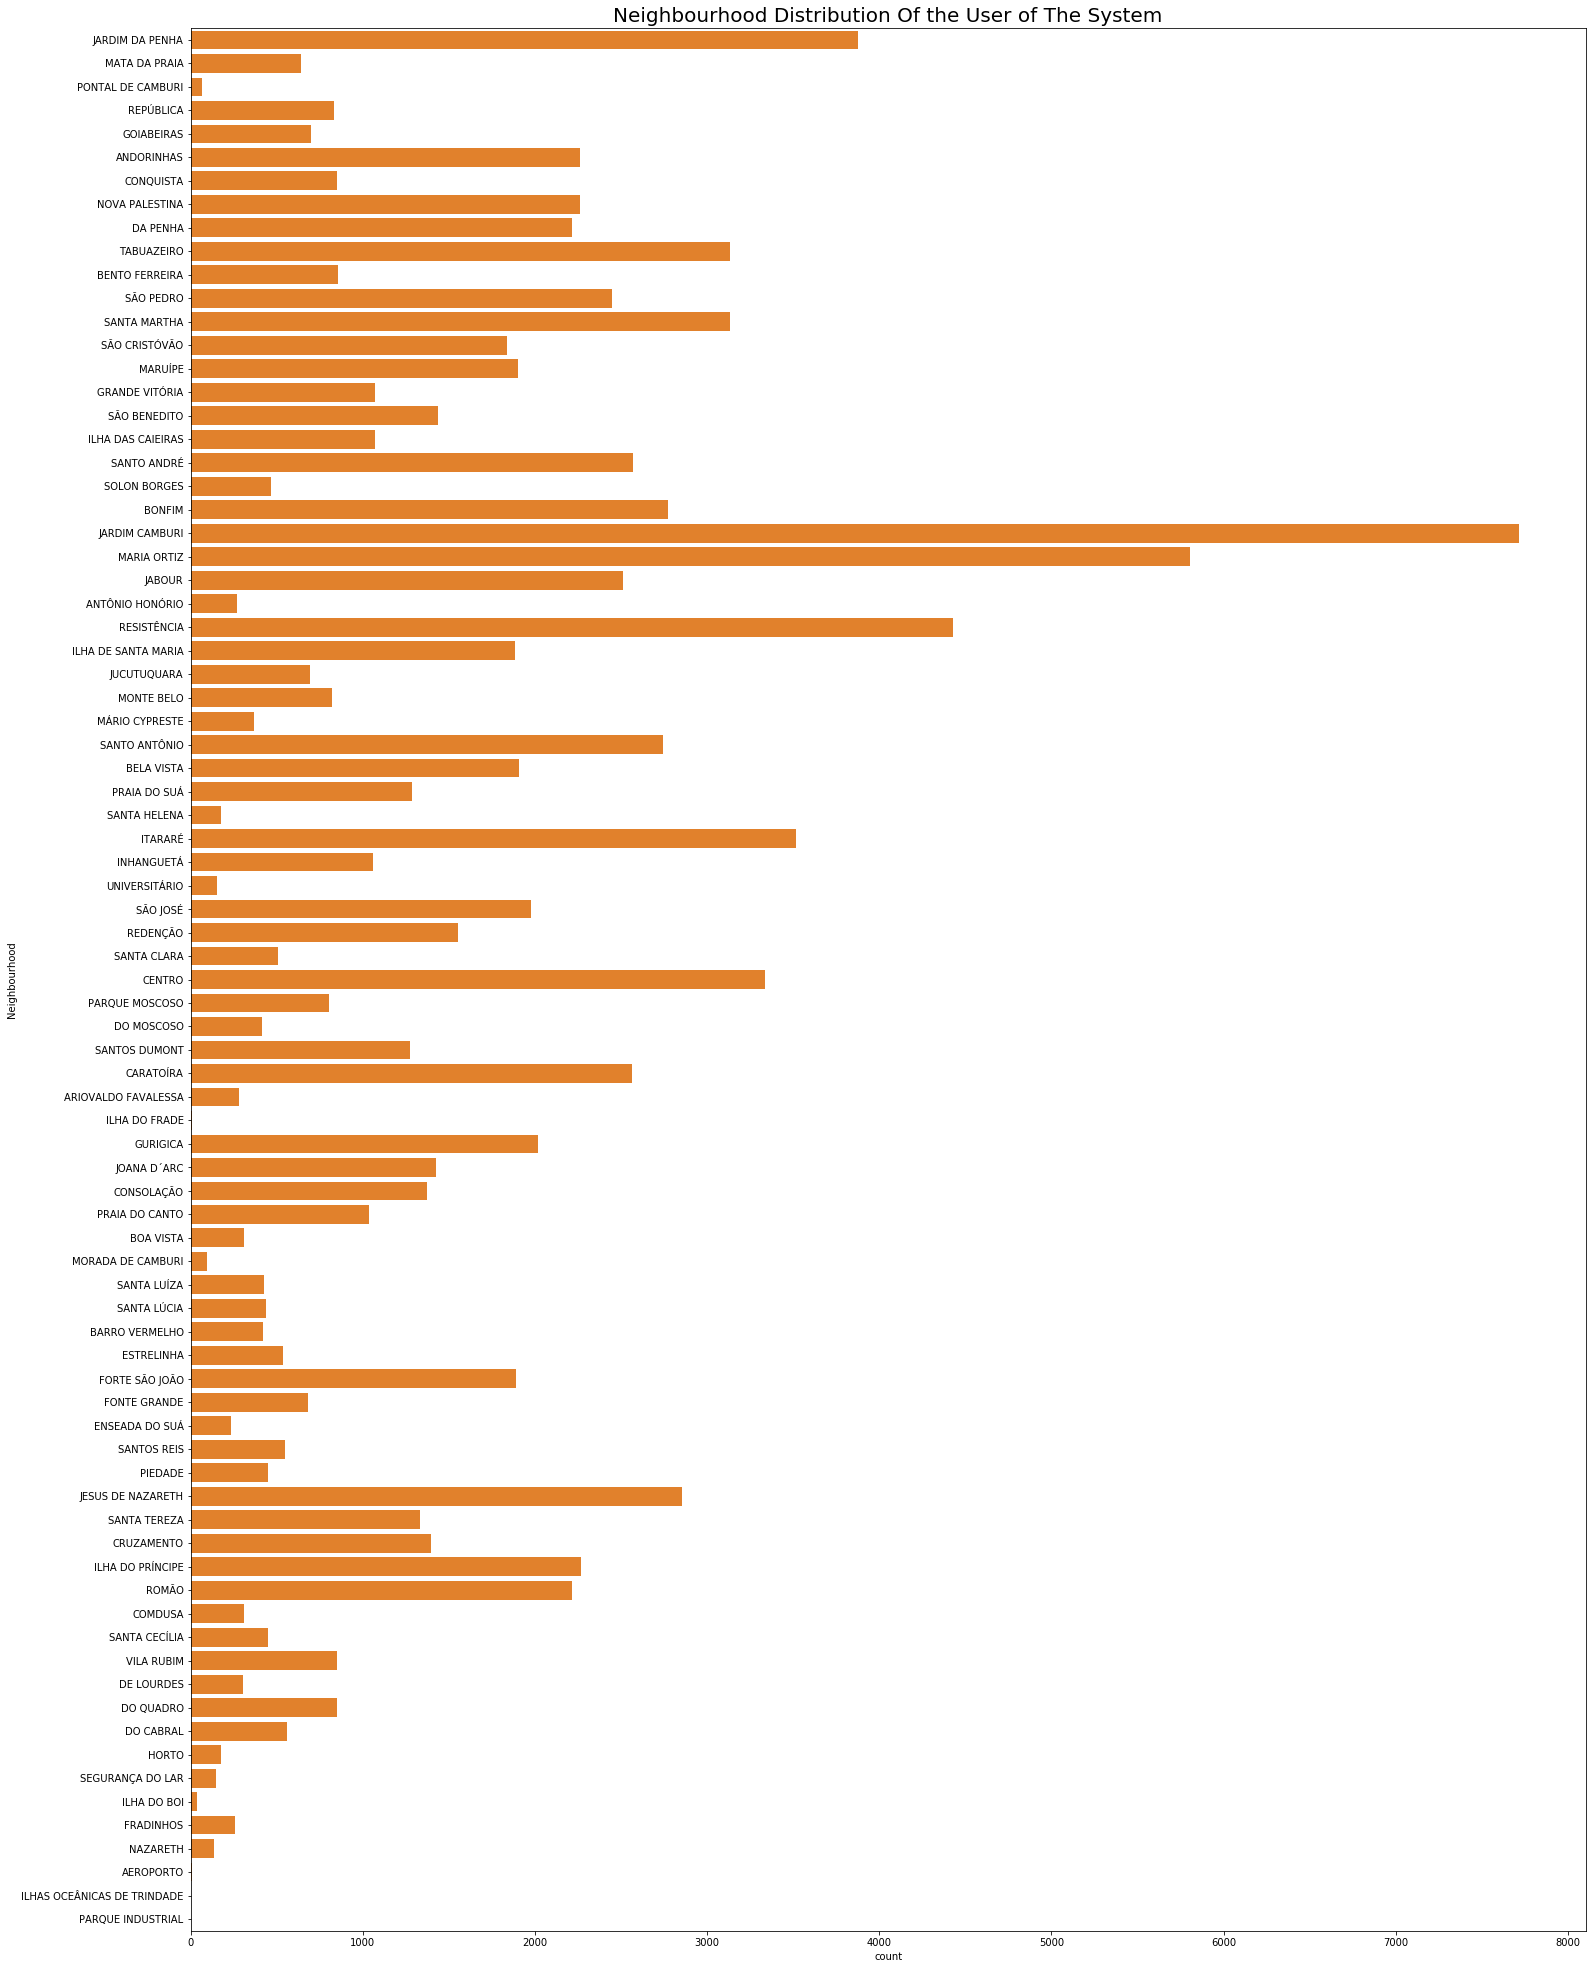

In [220]:
viz('Neighbourhood', 1)
plt.savefig('image04.png');

#### Insight

Jardim Camburi is the location with the most number of patients with 7717(6.98%) while Parque Industrial has the least with just 1 patirnt (0.000905%)

### Appointment Day Distribution 

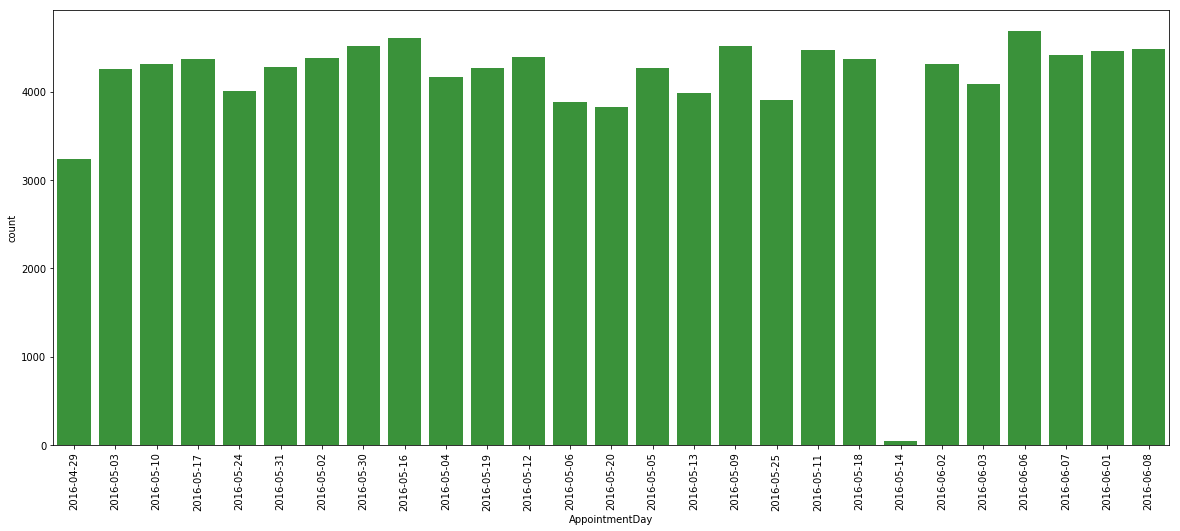

In [221]:
xviz('AppointmentDay',2)
plt.savefig('image05.png');

In [222]:
#Appointment Day Distribution Count
pd.DataFrame(df['AppointmentDay'].value_counts())


,AppointmentDay
2016-06-06,4691
2016-05-16,4613
2016-05-09,4520
2016-05-30,4514
2016-06-08,4479
2016-05-11,4474
2016-06-01,4464
2016-06-07,4416
2016-05-12,4394
2016-05-02,4376


In [223]:
df['AppointmentDay'].nunique()

27

#### Insight 

There were 27 days of appointment. 
2016-05-14 had the least appointments with only 39 appointments while 4691appointments were attended to on 2016-06-06.

### Scholarship Distribution 

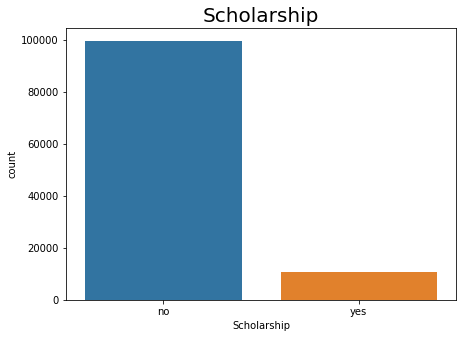

In [224]:
#scholarship distribution
countplot(df, 'Scholarship')
plt.savefig('image06.png');

In [225]:
#scholarship distribution count
pd.DataFrame(df['Scholarship'].value_counts())

,Scholarship
no,99665
yes,10861


In [226]:
#scholarship distribution percentage
pd.DataFrame(df['Scholarship'].value_counts(normalize=True)*100)

,Scholarship
no,90.173353
yes,9.826647


#### Insight 

99665 patients do not have scholarship while 10861 have

90.17% of patients do not have scholarship

### Hypertension Distribution 

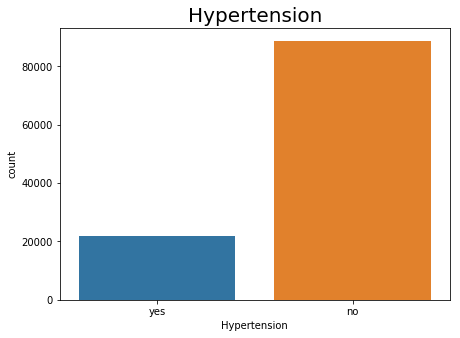

In [227]:
#Hypertension Distribution
countplot(df, 'Hypertension')
plt.savefig('image07.png');

In [228]:
#Hypertension Distribution Count
pd.DataFrame(df['Hypertension'].value_counts())

,Hypertension
no,88725
yes,21801


In [229]:
#Hypertension Distribution Percentage
pd.DataFrame(df['Hypertension'].value_counts(normalize=True)*100)

,Hypertension
no,80.275229
yes,19.724771


#### Insight 

19.72%(21,801) of patients have hypertension, while 80.27%(88725) of them were not diagnosed with hypertenion

### Alcoholism Distribution 

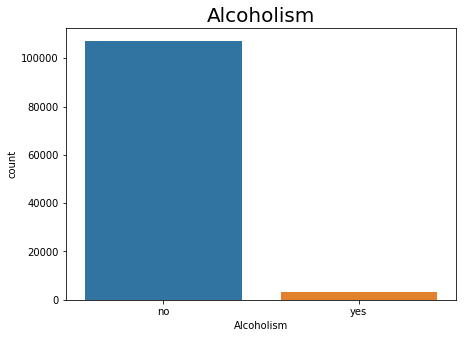

In [230]:
#Alcoholism Distribution
countplot(df, 'Alcoholism')
plt.savefig('image08.png');

In [231]:
pd.DataFrame(df['Alcoholism'].value_counts())

,Alcoholism
no,107166
yes,3360


In [232]:
pd.DataFrame(df['Alcoholism'].value_counts(normalize=True)*100)

,Alcoholism
no,96.959991
yes,3.040009


#### Insight 

A whooping 96.96% (107166) of patients were undiagnosed with alcoholism while 3.04% (3360patients) struggle with alcoholism

## Diabetes Distribution 

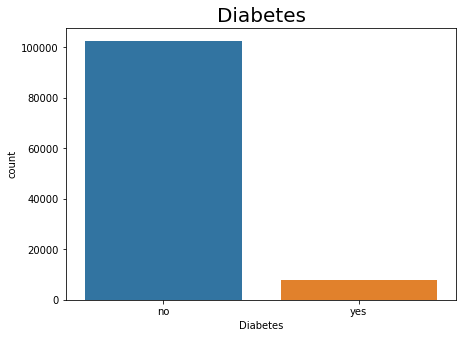

In [233]:
#Diabetes Distribution
countplot(df, 'Diabetes')
plt.savefig('image09.png');

In [234]:
pd.DataFrame(df['Diabetes'].value_counts())

,Diabetes
no,102583
yes,7943


In [235]:
pd.DataFrame(df['Diabetes'].value_counts(normalize=True)*100)

,Diabetes
no,92.813456
yes,7.186544


#### Insight 

92.81% (102583) of patients were undiagnosed with diabetes while 7.19% (7943 patients) have diabetes

### SMS distribution 

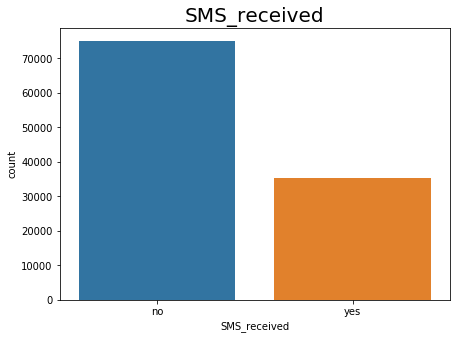

In [236]:
#SMS Distribution
countplot(df, 'SMS_received')
plt.savefig('image10.png');

In [237]:
pd.DataFrame(df['SMS_received'].value_counts())

,SMS_received
no,75044
yes,35482


In [238]:
pd.DataFrame(df['SMS_received'].value_counts(normalize=True)*100)

,SMS_received
no,67.897146
yes,32.102854


#### Insight 

32.1% (35482) of patients received sms reminders  while 67.89% (75044patients) did not receive any sms reminders

### Patients' Attendance Distribution 

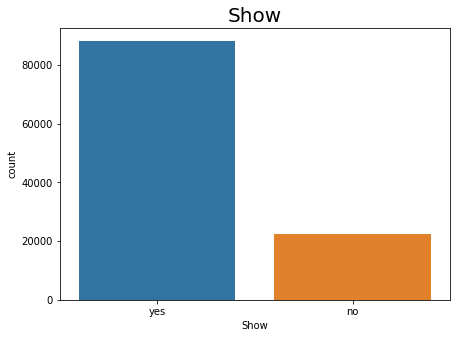

In [239]:
#Show Distribution
countplot(df, 'Show')
plt.savefig('image11.png');

In [240]:
#show distribution count
pd.DataFrame(df['Show'].value_counts())

,Show
yes,88207
no,22319


In [241]:
#show distribution percentage
pd.DataFrame(df['Show'].value_counts(normalize=True)*100)

,Show
yes,79.806561
no,20.193439


#### Insight 

Only 20.19%(22,319 patients) of patients missed their appointment day. 79.81%(88,207 patients) showed up on their appointment day 

## Bivariate Exploration 

### Does Having A Scholarship Affect If Patients Show Up For Appointment?

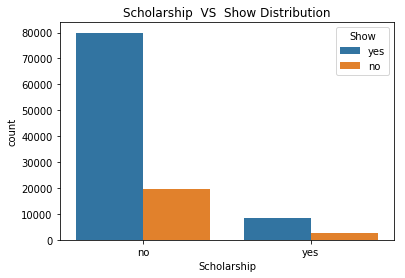

In [242]:
#checking the influence of scholarship on patience showing up for appointment
bicountplot(df,'Scholarship','Show')
plt.savefig('image12.png');

In [243]:
#comparing with count
pd.DataFrame(df.groupby('Scholarship')['Show'].value_counts())

Show
Scholarship Show       
no          yes   79924
            no    19741
yes         yes    8283
            no     2578

In [244]:
#percentage Comparison
pd.DataFrame(df.groupby('Scholarship')['Show'].value_counts(normalize=True)*100)

Show
Scholarship Show           
no          yes   80.192645
            no    19.807355
yes         yes   76.263696
            no    23.736304

#### Insight 

From the plot and analysis, 76.26% of scholarship patients showed up for their appointment.
Having a scholarship has no effect on patient's showing up for their appointment. the patients without scholarship showed up alot more in numbers and percentage.

### Does Gender Influence if Patient Shows Up for Appointment? 

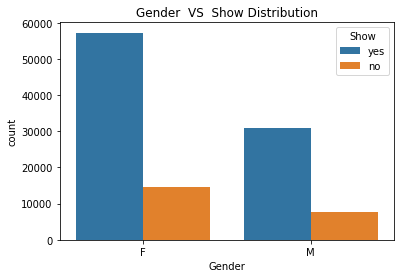

In [245]:
#checking the influence of gender on patient showing up for appointment
bicountplot(df,'Gender','Show')
plt.savefig('image13.png');

In [246]:
#comparing count
pd.DataFrame(df.groupby('Gender')['Show'].value_counts())

Show
Gender Show       
F      yes   57245
       no    14594
M      yes   30962
       no     7725

In [247]:
#percentage comparison
pd.DataFrame(df.groupby('Gender')['Show'].value_counts(normalize=True)*100)

Show
Gender Show           
F      yes   79.685129
       no    20.314871
M      yes   80.032052
       no    19.967948

#### Insight 

From the plot and analysis, it can be determined that approximately only 20% of male and 20% of female patients showed up for their appointment. 

### Does receiving SMS influence if patient shows up for appointment?

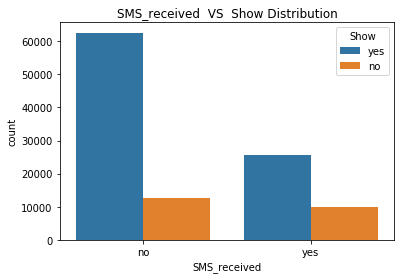

In [248]:
#checking the influence of SMS on patient showing up for appointment
bicountplot(df,'SMS_received','Show')
plt.savefig('image14.png');

In [249]:
pd.DataFrame(df.groupby('SMS_received')['Show'].value_counts())

Show
SMS_received Show       
no           yes   62509
             no    12535
yes          yes   25698
             no     9784

In [250]:
pd.DataFrame(df.groupby('SMS_received')['Show'].value_counts(normalize=True)*100)

Show
SMS_received Show           
no           yes   83.296466
             no    16.703534
yes          yes   72.425455
             no    27.574545

#### Insight 

From the plot and analysis, only 27.5 % of those who received SMS missed their appointment while only 16.7% of those who did not receive an sms missed their appointment. 

### Does Having an incurable disease affect if patients show up for appointment?

The 2 incurable illnesses are Diabetes and Hypertension

#### Effect of Diabetes on Patient's Showing Up for Appointment

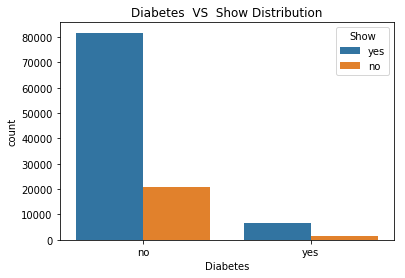

In [251]:
#checking the influence of diabetes on patient showing up for appointment
bicountplot(df,'Diabetes','Show')
plt.savefig('image15.png');

In [252]:
pd.DataFrame(df.groupby('Diabetes')['Show'].value_counts(normalize=True)*100)

Show
Diabetes Show           
no       yes   79.636977
         no    20.363023
yes      yes   81.996727
         no    18.003273

In [253]:
pd.DataFrame(df.groupby('Diabetes')['Show'].value_counts())

Show
Diabetes Show       
no       yes   81694
         no    20889
yes      yes    6513
         no     1430

#### Insight 

Out of everyone with diabetes, only 18% of the patients missed their appointment. 81% of patients who showed up for their appointment have diabetes.
While out of everyone without diabetes, 79.63% of patients attended their appointment.


#### Effect of Hypertension on Patient's Showing Up for Appointment 

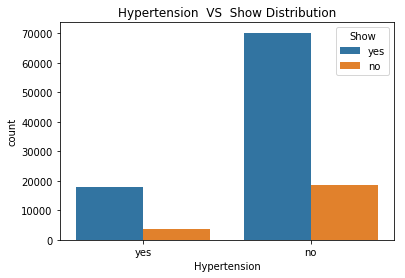

In [254]:
bicountplot(df,'Hypertension','Show')
plt.savefig('image16.png');

In [255]:
pd.DataFrame(df.groupby('Hypertension')['Show'].value_counts())

Show
Hypertension Show       
no           yes   70178
             no    18547
yes          yes   18029
             no     3772

In [256]:
pd.DataFrame(df.groupby('Hypertension')['Show'].value_counts(normalize=True)*100)

Show
Hypertension Show           
no           yes   79.096083
             no    20.903917
yes          yes   82.698041
             no    17.301959

#### Insight 

Only 17.3% of patients with hypertension missed their appointment day. 20.9% of patients without hypertension missed their appointment.

# Conclusion

Having a scholarship has no effect on patient's showing up for their appointment. the patients without scholarship showed up alot more in numbers and percentage.

Although there are more women than men, the average percentage of women  who showed up for their appointment is equal to men.

Receiving an SMS reminder has no effect on patients showing up for their appointments as more patients showed up when they did not receive the SMS

Patients with diabetes have a higher showup rate than patients without.

Patients with hyper tension have a higher appointment show up rate when compared to patients without.

In general, patients with incurable illnesses are more likely to show up for their appointments copmared to patients without.

# Limitation

The investigation carried out was based on my personal understanding and interpretation of data set given. The column headings of the various illnesses maybe interpreted as diagnosis after the medical appointment or before. I chose the later. 

There is ambiguity in the column headings.

In [257]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295